In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
import numpy as np
import scipy.stats as scist

def record(theta):

    mu1=10.*(np.cos(theta-np.pi/8)+1)/2
    
    mu2=2.*(np.cos(theta-5*np.pi/8)+1)/2

    k=np.zeros((2,len(theta)))
    noise=np.random.rand(2,len(theta))
    for n in range(len(theta)):
        th=theta[n]
        k[0,n]=scist.poisson.ppf(noise[0,n],mu1[n])
        k[1,n]=scist.poisson.ppf(noise[1,n],mu2[n])


    return k

In [3]:
my_theta = np.pi * np.arange(12) / 12

my_theta_add = np.pi *5 / 12 * np.ones(9)
my_theta = np.concatenate((my_theta, my_theta_add))
print(my_theta)
my_theta = np.sort(my_theta)
print(my_theta)
print(my_theta.shape)

[0.         0.26179939 0.52359878 0.78539816 1.04719755 1.30899694
 1.57079633 1.83259571 2.0943951  2.35619449 2.61799388 2.87979327
 1.30899694 1.30899694 1.30899694 1.30899694 1.30899694 1.30899694
 1.30899694 1.30899694 1.30899694]
[0.         0.26179939 0.52359878 0.78539816 1.04719755 1.30899694
 1.30899694 1.30899694 1.30899694 1.30899694 1.30899694 1.30899694
 1.30899694 1.30899694 1.30899694 1.57079633 1.83259571 2.0943951
 2.35619449 2.61799388 2.87979327]
(21,)


In [4]:
def my_likelihood(my_lambda, my_k1, my_k2):
    lambda1, lambda2 = my_lambda
    y = 0
    
    for i in range(len(my_k1)):
        y += np.log(lambda1**my_k1[i] * lambda2**my_k2[i] * np.exp(-lambda1-lambda2) / (np.math.factorial(my_k1[i]) * np.math.factorial(my_k1[i])))
       
    
    return -y

In [5]:
N = 100
my_k1 = np.zeros((N, len(my_theta)))
my_k2 = np.zeros((N, len(my_theta)))
lambda1 = 1
lambda2 = 1


for i in range(N):
    kk = record(my_theta)
    my_k1[i,:] = kk[0,:]
    my_k2[i,:] = kk[1,:]
    


<ipython-input-4-a40cbe2a2625>:6: RuntimeWarning: invalid value encountered in log
  y += np.log(lambda1**my_k1[i] * lambda2**my_k2[i] * np.exp(-lambda1-lambda2) / (np.math.factorial(my_k1[i]) * np.math.factorial(my_k1[i])))


Optimization terminated successfully.
         Current function value: 1721.893013
         Iterations: 53
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 1886.085937
         Iterations: 57
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 2011.359478
         Iterations: 59
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 1898.339407
         Iterations: 52
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 1650.380794
         Iterations: 51
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: 1400.468942
         Iterations: 45
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 1533.407586
         Iterations: 50
         Function evaluations: 96
Optimizat

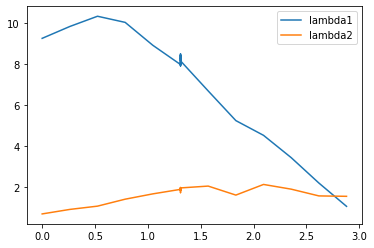

In [7]:
result_lambda1 = []
result_lambda2 = []
my_lambda = [lambda1, lambda2]

for i in range(len(my_theta)):
    minimum = optimize.fmin(my_likelihood, my_lambda, args = (my_k1[:, i], my_k2[:, i]))
    result_lambda1.append(minimum[0])
    result_lambda2.append(minimum[1])
    
plt.figure()
plt.plot(my_theta, result_lambda1, label = 'lambda1')
plt.plot(my_theta, result_lambda2, label = 'lambda2')
plt.legend()
    



In [9]:
print(my_k1.shape)

(100, 21)


In [8]:
my_enthropy1 = 0
my_enthropy2 = 0
p_theta = 1/21

#FOR THE FIRST

for i in range(N):
    for k in range(21):
        my_margin = 0
        for j in range(21):
            cur_lambda = result_lambda1[j]
            my_margin +=  (cur_lambda ** my_k1[i, k] * np.exp(-cur_lambda) / np.math.factorial(my_k1[i, k]) ) * p_theta

        my_enthropy1 += np.log(my_margin)
    
    
my_enthropy1 = -my_enthropy1 / (N*21)

print(my_enthropy1)



#FOR THE SECOND

for i in range(N):
    for k in range(21):
        my_margin = 0
        for j in range(21):
            cur_lambda = result_lambda2[j]
            my_margin +=  (cur_lambda ** my_k2[i, k] * np.exp(-cur_lambda) / np.math.factorial(my_k2[i, k]) ) * p_theta

        my_enthropy2 += np.log(my_margin)
    
    
my_enthropy2 = -my_enthropy2 / (N*21)

print(my_enthropy2)

2.6843465191038547
1.639702773203685


In [58]:
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#CALCULATING MUTUAL INFORMATION
 


In [1]:
##I CHECK DIFFERENT WAYS TO CALCULATE IT



In [2]:
##I CHECK DIFFERENT WAYS TO CALCULATE IT


In [9]:
#THE LAST WAY I CALCULATED IT

noise_ent1 = 0
noise_ent2 = 0
p_theta = 1/21

#FOR THE FIRST

for i in range(N):
    my_dent = 0
    for j in range(21):
        cur_lambda = result_lambda1[j]
        my_dent +=  (-my_k1[i, j] * np.log(cur_lambda) + cur_lambda + np.log(float(np.math.factorial(my_k1[i, j]))))

    noise_ent1 += my_dent
    
    
noise_ent1 = noise_ent1 / (N * 21)

print('Entropy1',my_enthropy1)
print('Noise entropy1',noise_ent1)



#FOR THE SECOND

for i in range(N):
    my_dent = 0
    for j in range(21):
        cur_lambda = result_lambda2[j]
        my_dent +=  (-my_k2[i, j] * np.log(cur_lambda) + cur_lambda + np.log(float(np.math.factorial(my_k2[i, j]))))

    noise_ent2 += my_dent
    
    
noise_ent2 = noise_ent2 / (N * 21)

print('Entropy2',my_enthropy2)
print('Noise entropy2',noise_ent2)


mut_info = my_enthropy1+my_enthropy2 - noise_ent1-noise_ent2
print('Mutual info', mut_info)

Entropy1 2.6843465191038547
Noise entropy1 2.3168806812942684
Entropy2 1.639702773203685
Noise entropy2 1.5952422208947463
Mutual info 0.41192639011852483


In [10]:
upper_bound = np.log(1 + np.var(my_theta) / (np.var(my_k1) + np.var(my_k2))) / 2
print('Upper bound', upper_bound)       

Upper bound 0.015454127950320183
